In [254]:
### import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
import datetime as dt
import numpy as np
import datetime

In [255]:
### reading the dataset
agent_2 = pd.read_excel('agent_followup_data.xlsx', sheet_name='Dataset')

In [224]:
### checking first 5 rows of the dataset
agent_2.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


In [34]:
agent_2.isna().sum()

id                 0
followup_date      0
lead_created_at    0
leadId             0
followup_type      0
agentId            0
additional_data    0
dtype: int64

In [258]:
k=agent_2.iloc[:,1:].duplicated(subset=None, keep='first')
#agent_2.drop('id', axis=1).duplicated(subset=None, keep='first').value_counts()

In [259]:
### dropping the duplicate entries
agent_2 = agent_2.iloc[:,1:].drop_duplicates()

In [227]:
agent_2.tail()

,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
68349,2020-03-11 21:10:18,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': True}
68350,2020-03-11 21:11:12,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False}
68351,2020-03-20 17:08:10,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False}
68352,2020-06-05 15:24:48,2017-12-05 05:10:00-05:00,27972,textmessages,7,{'is_incoming': False}
68353,2020-01-22 20:26:54,2019-07-16 09:56:00-04:00,16281,textmessages,4,{'is_incoming': False}


In [257]:
agent_2.reset_index(inplace=True, drop=True)
agent_2

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"
...,...,...,...,...,...,...,...
68349,68350,2020-03-11 21:10:18,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': True}
68350,68351,2020-03-11 21:11:12,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False}
68351,68352,2020-03-20 17:08:10,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False}
68352,68353,2020-06-05 15:24:48,2017-12-05 05:10:00-05:00,27972,textmessages,7,{'is_incoming': False}


In [260]:
### extracting the call durations, and is_incoming flag
additional = [re.findall(r'\d+|True|False', add) for add in agent_2.additional_data]
#r : we are using regex 
#\d: digits
#+ multiple

In [92]:
additional

[['0', 'False'],
 ['0', 'False'],
 ['91', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['466', 'False'],
 ['77', 'False'],
 ['54', 'False'],
 ['11', 'True'],
 ['52', 'False'],
 ['0', 'False'],
 ['89', 'True'],
 ['0', 'True'],
 ['16', 'True'],
 ['16', 'True'],
 ['23', 'False'],
 ['23', 'False'],
 ['149', 'False'],
 ['15', 'True'],
 ['304', 'False'],
 ['68', 'False'],
 ['151', 'True'],
 ['1084', 'False'],
 ['0', 'True'],
 ['14', 'False'],
 ['977', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['61', 'False'],
 ['57', 'False'],
 ['38', 'False'],
 ['128', 'False'],
 ['190', 'False'],
 ['86', 'False'],
 ['1', 'False'],
 ['5', 'False'],
 ['9', 'False'],
 ['215', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['4', 'False'],
 ['16', 'True'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['38', 'False'],
 ['51', 'False'],
 ['40', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['1059', 'False'],
 ['41', 'False'],
 ['0', 'False'],
 ['0', 'False

### Top agents who made most of the follow-ups (most active agents)

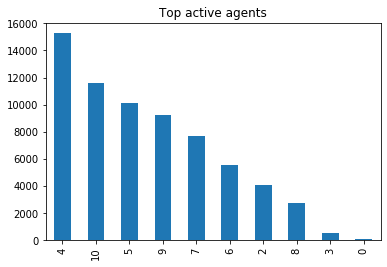

In [261]:
### Taking count of each agent
#agent_2.agentId.value_counts().plot(kind='bar')
agent_2['agentId'].value_counts().plot(kind='bar')
plt.title('Top active agents')
plt.show()

In [74]:
agent_2.head()

,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


#### Inference
- As can be observed that 4, 10 and 5 are the most active agents, in the same order

In [231]:
### contribution of followups of each agent through different channels
agent_2.groupby('agentId')['followup_type'].value_counts()/len(agent_2)*100

#accessing the data in grouped df 
###for key, item in g:
    ###print(g.get_group(key), "\n\n")

agentId  followup_type
0        textmessages      0.171734
2        emails            5.526850
         textmessages      0.470402
         calls             0.097067
3        emails            0.761603
         textmessages      0.019413
4        emails           10.660952
         textmessages     10.541485
         calls             1.621767
5        emails           14.806463
         textmessages      0.252374
         calls             0.008960
6        textmessages      4.687593
         emails            3.339108
         calls             0.313601
7        emails            7.613046
         textmessages      3.627322
         calls             0.273281
8        emails            2.904546
         textmessages      0.737710
         calls             0.436055
9        emails           10.868526
         textmessages      1.754674
         calls             1.215579
10       emails            8.305955
         textmessages      8.017741
         calls             0.966191
Name:

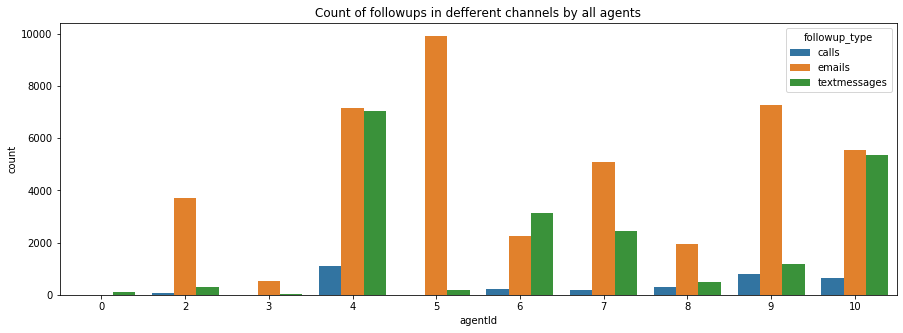

In [232]:
### Visualising count of followups of each agent through different channels
plt.figure(figsize=(15,5)) ## breadth , height
sn.countplot(x='agentId', data=agent_2, hue='followup_type')
plt.title('Count of followups in defferent channels by all agents')
plt.show()

In [233]:
agent_2.agentId.unique()

array([10,  4,  9,  7,  8,  2,  6,  5,  3,  0], dtype=int64)

#### Inference
- As can be seen agents 4 and 10 have made use of at least 2 columns to the same extent i.e., emails and text messages, while others have mostly used only channel

In [234]:
### Counting number of unique leads
agent_unique_leads = []
for a in agent_2.agentId.unique():
    agent_unique_leads.append([a,len(agent_2[agent_2.agentId==a]['leadId'].unique())])
agent_unique_leads

[[10, 1425],
 [4, 1599],
 [9, 876],
 [7, 364],
 [8, 568],
 [2, 874],
 [6, 351],
 [5, 398],
 [3, 343],
 [0, 5]]

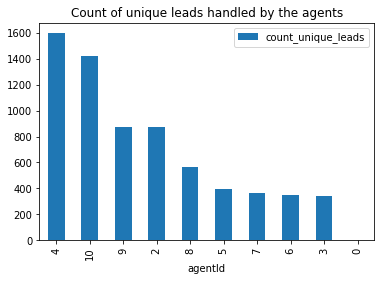

In [235]:
### Visualising count of unique leads for different agents
pd.DataFrame(agent_unique_leads, columns=['agentId', 'count_unique_leads']).set_index('agentId').sort_values('count_unique_leads', ascending=False).plot(kind='bar')
plt.title('Count of unique leads handled by the agents')
plt.show()

#### Inference
- As can be seen agents 4, 10 and 9 (as well as 2), are the ones who have handled the maximum number of leads, and agent 0 has handled the least

In [203]:
agent_2.tail()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,difference
68349,68350,2020-03-11 21:10:18+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': True},725 days 08:01:18
68350,68351,2020-03-11 21:11:12+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': False},725 days 08:02:12
68351,68352,2020-03-20 17:08:10+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': False},734 days 03:59:10
68352,68353,2020-06-05 15:24:48+00:00,2017-12-05 10:10:00+00:00,27972,textmessages,7,{'is_incoming': False},913 days 05:14:48
68353,68354,2020-01-22 20:26:54+00:00,2019-07-16 13:56:00+00:00,16281,textmessages,4,{'is_incoming': False},190 days 06:30:54


In [236]:
additional

[['0', 'False'],
 ['0', 'False'],
 ['91', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['466', 'False'],
 ['77', 'False'],
 ['54', 'False'],
 ['11', 'True'],
 ['52', 'False'],
 ['0', 'False'],
 ['89', 'True'],
 ['0', 'True'],
 ['16', 'True'],
 ['16', 'True'],
 ['23', 'False'],
 ['23', 'False'],
 ['149', 'False'],
 ['15', 'True'],
 ['304', 'False'],
 ['68', 'False'],
 ['151', 'True'],
 ['1084', 'False'],
 ['0', 'True'],
 ['14', 'False'],
 ['977', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['61', 'False'],
 ['57', 'False'],
 ['38', 'False'],
 ['128', 'False'],
 ['190', 'False'],
 ['86', 'False'],
 ['1', 'False'],
 ['5', 'False'],
 ['9', 'False'],
 ['215', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['4', 'False'],
 ['16', 'True'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['38', 'False'],
 ['51', 'False'],
 ['40', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['1059', 'False'],
 ['41', 'False'],
 ['0', 'False'],
 ['0', 'False

In [237]:
### creating list of is_incoming flag
is_incoming = [tok[-1] for tok in additional]
is_incoming

['False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False

In [238]:
### adding is_incoming flag variables to the dataframe
agent_2['is_incoming'] = is_incoming
agent_2

,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,is_incoming
0,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",False
1,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",False
2,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}",False
3,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}",False
4,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}",False
...,...,...,...,...,...,...,...
66959,2020-03-11 21:10:18,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': True},True
66960,2020-03-11 21:11:12,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False},False
66961,2020-03-20 17:08:10,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False},False
66962,2020-06-05 15:24:48,2017-12-05 05:10:00-05:00,27972,textmessages,7,{'is_incoming': False},False


In [239]:
### converting flag variable into numerical variable
agent_2['is_incoming'] = agent_2.is_incoming.map(lambda x: 1 if x=='True' else 0)

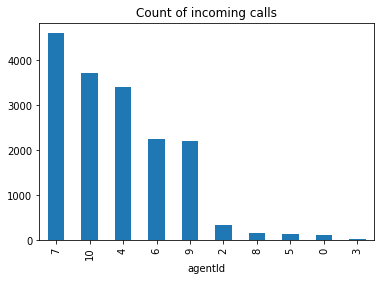

In [240]:
### Visualising count of incoming calls for different agents
agent_2.groupby('agentId')['is_incoming'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Count of incoming calls')
plt.show()

In [241]:
additional

[['0', 'False'],
 ['0', 'False'],
 ['91', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['466', 'False'],
 ['77', 'False'],
 ['54', 'False'],
 ['11', 'True'],
 ['52', 'False'],
 ['0', 'False'],
 ['89', 'True'],
 ['0', 'True'],
 ['16', 'True'],
 ['16', 'True'],
 ['23', 'False'],
 ['23', 'False'],
 ['149', 'False'],
 ['15', 'True'],
 ['304', 'False'],
 ['68', 'False'],
 ['151', 'True'],
 ['1084', 'False'],
 ['0', 'True'],
 ['14', 'False'],
 ['977', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['61', 'False'],
 ['57', 'False'],
 ['38', 'False'],
 ['128', 'False'],
 ['190', 'False'],
 ['86', 'False'],
 ['1', 'False'],
 ['5', 'False'],
 ['9', 'False'],
 ['215', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['4', 'False'],
 ['16', 'True'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['38', 'False'],
 ['51', 'False'],
 ['40', 'False'],
 ['0', 'False'],
 ['0', 'False'],
 ['1059', 'False'],
 ['41', 'False'],
 ['0', 'False'],
 ['0', 'False

#### Inference
- As can be seen agents 7, 10 and 4 are the ones whom maximum number of calls were made

In [242]:
duration = []
for tok in additional:
    if tok[0] in ['True', 'False']:
        duration.append(np.nan)
    else:
        duration.append(int(tok[0]))

In [214]:
duration

[0,
 0,
 91,
 0,
 0,
 466,
 77,
 54,
 11,
 52,
 0,
 89,
 0,
 16,
 16,
 23,
 23,
 149,
 15,
 304,
 68,
 151,
 1084,
 0,
 14,
 977,
 0,
 0,
 61,
 57,
 38,
 128,
 190,
 86,
 1,
 5,
 9,
 215,
 0,
 0,
 4,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 38,
 51,
 40,
 0,
 0,
 1059,
 41,
 0,
 0,
 0,
 0,
 0,
 52,
 171,
 13,
 8,
 30,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 54,
 0,
 6,
 1,
 59,
 0,
 59,
 41,
 62,
 19,
 39,
 59,
 5,
 46,
 0,
 0,
 0,
 24,
 0,
 95,
 0,
 0,
 5,
 47,
 30,
 0,
 52,
 53,
 17,
 13,
 44,
 23,
 78,
 0,
 0,
 0,
 36,
 44,
 0,
 0,
 52,
 0,
 0,
 50,
 57,
 56,
 635,
 141,
 0,
 0,
 63,
 0,
 261,
 0,
 0,
 349,
 24,
 0,
 23,
 0,
 0,
 0,
 0,
 47,
 0,
 0,
 61,
 44,
 81,
 0,
 0,
 0,
 0,
 3,
 0,
 48,
 0,
 0,
 0,
 53,
 9,
 56,
 46,
 94,
 0,
 46,
 55,
 69,
 38,
 0,
 55,
 0,
 34,
 52,
 17,
 19,
 19,
 67,
 0,
 18,
 8,
 55,
 0,
 0,
 47,
 0,
 6,
 96,
 43,
 39,
 64,
 26,
 0,
 0,
 91,
 0,
 37,
 111,
 28,
 0,
 0,
 0,
 9,
 0,
 0,
 137,
 39,
 34,
 51,
 0,
 42,
 54,
 84,
 0,
 0,
 0,
 55,
 0,
 0,
 3

In [243]:
agent_2

,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,is_incoming
0,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",0
1,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",0
2,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}",0
3,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}",0
4,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}",0
...,...,...,...,...,...,...,...
66959,2020-03-11 21:10:18,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': True},1
66960,2020-03-11 21:11:12,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False},0
66961,2020-03-20 17:08:10,2018-03-17 09:09:00-04:00,31965,textmessages,4,{'is_incoming': False},0
66962,2020-06-05 15:24:48,2017-12-05 05:10:00-05:00,27972,textmessages,7,{'is_incoming': False},0


In [274]:
agent_2['call_duration'] = duration

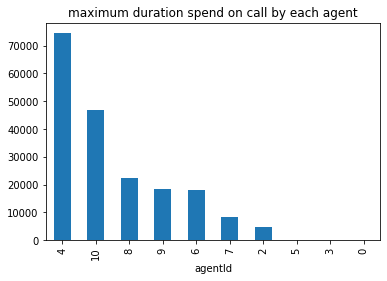

In [275]:
agent_2.groupby('agentId')['call_duration'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('maximum duration spend on call by each agent')
plt.show()

# agent_2[agent_2.agentId == 5]['difference']

In [293]:
k=pd.DataFrame(agent_2[~agent_2.call_duration.isnull()].groupby('agentId')['call_duration'].mean().sort_values(ascending=False)).rename(columns={'call_duration':'duration'})
k

,duration
agentId,
6,86.557143
8,76.760274
10,72.525502
2,71.246154
4,68.641805
7,46.251366
9,22.732187
5,0.000000


### Rating algorithm

#### Determinig agent rating based on how active an agent is

In [271]:
### creating new dataframe with ratings based on how active agents are
active_rating = pd.DataFrame(round(agent_2.agentId.value_counts(normalize=True)*10, 3)).rename(columns={'agentId':'active_rating'}).reset_index().rename(columns={'index':'agentId'})
active_rating

,agentId,active_rating
0,4,2.282
1,10,1.729
2,5,1.507
3,9,1.384
4,7,1.151
5,6,0.834
6,2,0.609
7,8,0.408
8,3,0.078
9,0,0.017


#### Determining rating based on channels used, assigning equal weights to each of calls, texts and emails, and calculating the expected value

In [116]:
### creating new dataframe with ratings based on to what extent different channels are used by the agents
channel_cont = pd.DataFrame(agent_2.groupby('agentId')['followup_type'].value_counts()/len(agent_2)).rename(columns={'followup_type':'channel'}).reset_index()
channel_cont

,agentId,followup_type,channel
0,0,textmessages,0.001717
1,2,emails,0.055269
2,2,textmessages,0.004704
3,2,calls,0.000971
4,3,emails,0.007616
5,3,textmessages,0.000194
6,4,emails,0.106610
7,4,textmessages,0.105415
8,4,calls,0.016218
9,5,emails,0.148065


In [120]:
agent_channel_rating = []
for agent in channel_cont.agentId.unique():
    agent_channel_rating.append([agent,round(((channel_cont[channel_cont.agentId==agent]['channel'].sum())/3)*100,3)])
agent_channel_rating

[[0, 0.057],
 [2, 2.031],
 [3, 0.26],
 [4, 7.608],
 [5, 5.023],
 [6, 2.78],
 [7, 3.838],
 [8, 1.359],
 [9, 4.613],
 [10, 5.763]]

1.5

In [121]:
channel_rating = pd.DataFrame(agent_channel_rating, columns=['agentId', 'channel_rating'])
channel_rating

,agentId,channel_rating
0,0,0.057
1,2,2.031
2,3,0.260
3,4,7.608
4,5,5.023
5,6,2.780
6,7,3.838
7,8,1.359
8,9,4.613
9,10,5.763


In [122]:
agent_unique_leads

[[10, 1425],
 [4, 1599],
 [9, 876],
 [7, 364],
 [8, 568],
 [2, 874],
 [6, 351],
 [5, 398],
 [3, 343],
 [0, 5]]

#### Determining rating based on unique leads handled

In [123]:
### creating dataframes with ratings based on how many unique leads each agent dealt with
agent_unique_leads_df = pd.DataFrame(agent_unique_leads, columns=['agentId', 'count_unique_leads']).set_index('agentId').sort_values('count_unique_leads', ascending=False)
agent_unique_leads_df

,count_unique_leads
agentId,
4,1599
10,1425
9,876
2,874
8,568
5,398
7,364
6,351
3,343


In [124]:
pd.DataFrame(agent_unique_leads, columns=['agentId', 'count_unique_leads']).set_index('agentId').sort_values('count_unique_leads', ascending=False)
agent_unique_leads

[[10, 1425],
 [4, 1599],
 [9, 876],
 [7, 364],
 [8, 568],
 [2, 874],
 [6, 351],
 [5, 398],
 [3, 343],
 [0, 5]]

In [224]:
agent_unique_leads_df = agent_unique_leads_df/agent_unique_leads_df.sum()*10
agent_unique_leads_df

,count_unique_leads
agentId,
4,2.350434
10,2.094664
9,1.287667
2,1.284727
8,0.834926
5,0.585036
7,0.535058
6,0.515949
3,0.504189


In [281]:
agent_unique_leads_df = agent_unique_leads_df.reset_index()
agent_unique_leads_df
k

,call_duration
agentId,
6,86.557143
8,76.760274
10,72.525502
2,71.246154
4,68.641805
7,46.251366
9,22.732187
5,0.000000


#### Merging the ratings dataframes

In [288]:
### Merging all the above ratings dataframes
final_ratings = pd.merge(pd.merge(active_rating, channel_rating, left_on='agentId', right_on='agentId'), agent_unique_leads_df, left_on='agentId', right_on='agentId')
final_ratings
final_ratings2 = pd.merge(final_ratings,k, left_on='agentId',right_on='agentId')
final_ratings2

,agentId,active_rating,channel_rating,count_unique_leads,duration
0,4,2.282,7.608,1599,68.641805
1,10,1.729,5.763,1425,72.525502
2,5,1.507,5.023,398,0.000000
3,9,1.384,4.613,876,22.732187
4,7,1.151,3.838,364,46.251366
5,6,0.834,2.780,351,86.557143
6,2,0.609,2.031,874,71.246154
7,8,0.408,1.359,568,76.760274


In [280]:
k

,call_duration
agentId,
6,86.557143
8,76.760274
10,72.525502
2,71.246154
4,68.641805
7,46.251366
9,22.732187
5,0.000000


In [126]:
combnined_rating = round(final_ratings.set_index('agentId').sum(axis=1)/3, 3)
combnined_rating

agentId
4     536.297
10    477.497
5     134.843
9     293.999
7     122.996
6     118.205
2     292.213
8     189.922
3     114.446
0       1.691
dtype: float64

In [127]:
### final average ratings
combnined_rating.sort_values(ascending=False)

agentId
4     536.297
10    477.497
9     293.999
2     292.213
8     189.922
5     134.843
7     122.996
6     118.205
3     114.446
0       1.691
dtype: float64

In [145]:
##using date for something 
agent_2.dtypes

id                               int64
followup_date      datetime64[ns, UTC]
lead_created_at    datetime64[ns, UTC]
leadId                           int64
followup_type                   object
agentId                          int64
additional_data                 object
dtype: object

In [143]:
agent_2['followup_date']= pd.to_datetime(agent_2['followup_date'],utc=True)

In [144]:
agent_2['lead_created_at']= pd.to_datetime(agent_2['lead_created_at'],utc=True)

In [146]:
agent_2['lead_created_at']

0       2019-11-04 21:12:00+00:00
1       2019-11-04 21:12:00+00:00
2       2019-12-26 13:30:32+00:00
3       2020-08-30 23:39:18+00:00
4       2017-01-28 16:04:00+00:00
                   ...           
68349   2018-03-17 13:09:00+00:00
68350   2018-03-17 13:09:00+00:00
68351   2018-03-17 13:09:00+00:00
68352   2017-12-05 10:10:00+00:00
68353   2019-07-16 13:56:00+00:00
Name: lead_created_at, Length: 68354, dtype: datetime64[ns, UTC]

In [148]:
agent_2['difference']= agent_2['followup_date'] - agent_2['lead_created_at']

In [191]:
agent_2

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,difference
0,1,2020-03-05 14:38:54+00:00,2019-11-04 21:12:00+00:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",121 days 17:26:54
1,2,2020-03-05 14:38:55+00:00,2019-11-04 21:12:00+00:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",121 days 17:26:55
2,3,2020-01-06 19:11:39+00:00,2019-12-26 13:30:32+00:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}",11 days 05:41:07
3,4,2020-08-31 13:12:53+00:00,2020-08-30 23:39:18+00:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}",0 days 13:33:35
4,5,2020-10-14 14:47:23+00:00,2017-01-28 16:04:00+00:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}",1354 days 22:43:23
...,...,...,...,...,...,...,...,...
68349,68350,2020-03-11 21:10:18+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': True},725 days 08:01:18
68350,68351,2020-03-11 21:11:12+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': False},725 days 08:02:12
68351,68352,2020-03-20 17:08:10+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': False},734 days 03:59:10
68352,68353,2020-06-05 15:24:48+00:00,2017-12-05 10:10:00+00:00,27972,textmessages,7,{'is_incoming': False},913 days 05:14:48


In [199]:
agent_2[agent_2.agentId == 5]['difference']

1553      0 days 07:12:41
1728      7 days 13:13:26
1729      7 days 13:14:25
2859    478 days 07:39:51
2860    482 days 00:58:52
               ...       
67693   844 days 03:57:39
67694   844 days 04:03:57
67695   871 days 00:17:03
67696   844 days 03:15:45
67757   154 days 17:57:44
Name: difference, Length: 11241, dtype: timedelta64[ns]

In [158]:
agent_2

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,difference
0,1,2020-03-05 14:38:54+00:00,2019-11-04 21:12:00+00:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",121 days 17:26:54
1,2,2020-03-05 14:38:55+00:00,2019-11-04 21:12:00+00:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",121 days 17:26:55
2,3,2020-01-06 19:11:39+00:00,2019-12-26 13:30:32+00:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}",11 days 05:41:07
3,4,2020-08-31 13:12:53+00:00,2020-08-30 23:39:18+00:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}",0 days 13:33:35
4,5,2020-10-14 14:47:23+00:00,2017-01-28 16:04:00+00:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}",1354 days 22:43:23
...,...,...,...,...,...,...,...,...
68349,68350,2020-03-11 21:10:18+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': True},725 days 08:01:18
68350,68351,2020-03-11 21:11:12+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': False},725 days 08:02:12
68351,68352,2020-03-20 17:08:10+00:00,2018-03-17 13:09:00+00:00,31965,textmessages,4,{'is_incoming': False},734 days 03:59:10
68352,68353,2020-06-05 15:24:48+00:00,2017-12-05 10:10:00+00:00,27972,textmessages,7,{'is_incoming': False},913 days 05:14:48


In [190]:
# agent_channel_rating = []
# for agent in channel_cont.agentId.unique():
#     agent_channel_rating.append([agent,round(((agent_2.groupby('agentId')['difference'].sum())/len(agent_2[agent_2.agentId == agent ]['difference'].unique()))*100,3)])
# agent_channel_rating

ValueError: overflow in timedelta operation

In [189]:
### average time taken 
agent_2.groupby('agentId')['difference'].value_counts()/len(agent_2[agent_2.agentId == ]['difference'].unique())*100


agentId  difference        
0        35 days 21:40:48      0.869565
         35 days 21:40:49      0.869565
         35 days 21:58:32      0.869565
         35 days 21:59:49      0.869565
         35 days 22:12:28      0.869565
                                 ...   
10       2581 days 04:05:18    0.869565
         2581 days 22:42:45    0.869565
         2604 days 22:52:34    0.869565
         2604 days 22:55:37    0.869565
         2662 days 23:03:17    0.869565
Name: difference, Length: 66638, dtype: float64

In [156]:
agent_2.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,difference
0,1,2020-03-05 14:38:54+00:00,2019-11-04 21:12:00+00:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",121 days 17:26:54
1,2,2020-03-05 14:38:55+00:00,2019-11-04 21:12:00+00:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}",121 days 17:26:55
2,3,2020-01-06 19:11:39+00:00,2019-12-26 13:30:32+00:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}",11 days 05:41:07
3,4,2020-08-31 13:12:53+00:00,2020-08-30 23:39:18+00:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}",0 days 13:33:35
4,5,2020-10-14 14:47:23+00:00,2017-01-28 16:04:00+00:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}",1354 days 22:43:23


#### Inference
- As can be seen having calculated ratings using different methods 4,10 and 9 are top 3 agents

#### Suggestions
- Other agents must be more pro-active with touchpoints,
- Other agents must make use of at least 2 columns to equal extent, or to the fullest,
- Other agents must take on more unique leads.